### Analyse Exploratoire du fichier myreport_sql_statistic_full.csv

####  Imports (fichier & modules)

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
tab=pd.read_csv('/Users/leylayu/Desktop/projet-industriel/smartETL/data/logServer/myreport_sql_statistic_full.csv')

####  Le fichier myreport_ping_full.csv : taille, colonnes

In [ ]:
print("Il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

In [84]:
lst=list(tab.columns)
lst

['Date et heure',
 'Date et heure(RAW)',
 'Nombre de requêtes de lots/s',
 'Nombre de requêtes de lots/s(RAW)',
 'Compilations SQL/s',
 'Compilations SQL/s(RAW)',
 'Recompilations SQL/s',
 'Recompilations SQL/s(RAW)',
 'Temps mort',
 'Temps mort(RAW)',
 'Couverture',
 'Couverture(RAW)']

In [86]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date et heure                      2882 non-null   object 
 1   Date et heure(RAW)                 2881 non-null   float64
 2   Nombre de requêtes de lots/s       2195 non-null   object 
 3   Nombre de requêtes de lots/s(RAW)  2194 non-null   float64
 4   Compilations SQL/s                 1912 non-null   object 
 5   Compilations SQL/s(RAW)            2194 non-null   float64
 6   Recompilations SQL/s               990 non-null    object 
 7   Recompilations SQL/s(RAW)          2194 non-null   float64
 8   Temps mort                         2195 non-null   object 
 9   Temps mort(RAW)                    2194 non-null   float64
 10  Couverture                         2882 non-null   object 
 11  Couverture(RAW)                    2881 non-null   float

In [88]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                        2882
Date et heure(RAW)                   2881
Nombre de requêtes de lots/s           96
Nombre de requêtes de lots/s(RAW)    1498
Compilations SQL/s                     84
Compilations SQL/s(RAW)              1608
Recompilations SQL/s                   18
Recompilations SQL/s(RAW)             492
Temps mort                              1
Temps mort(RAW)                         1
Couverture                              3
Couverture(RAW)                         2
dtype: int64


In [90]:
tab.head()

,Date et heure,Date et heure(RAW),Nombre de requêtes de lots/s,Nombre de requêtes de lots/s(RAW),Compilations SQL/s,Compilations SQL/s(RAW),Recompilations SQL/s,Recompilations SQL/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,"0,06 #",0.0622,"0,08 #",0.0802,NaN,0.0013,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,"0,02 #",0.0231,NaN,0.0051,NaN,0.0008,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,"0,07 #",0.0680,"0,09 #",0.0856,"0,04 #",0.0391,0 %,0.0,100 %,10000.0


In [ ]:
Suppression des valeurs NaN

In [92]:
num_deleted = tab.shape[0]
tab.dropna(inplace=True)
num_deleted -= tab.shape[0]

print(f"Number of rows deleted: {num_deleted}")

Number of rows deleted: 1894


In [94]:
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, epoch=datetime(1900, 1, 1)):
    # Adapted from above, thanks to @Martijn Pieters 

    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    inDays = int(ordinal)
    frac = ordinal - inDays
    inSecs = int(round(frac * 86400.0))

    return epoch + timedelta(days=inDays - 1, seconds=inSecs) # epoch is day 1

excelDT = 42548.75001           # Float representation of 27/06/2016  6:00:01 PM in Excel format  
pyDT = from_excel_ordinal(excelDT)
print(pyDT)

2016-06-27 18:00:01


In [96]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['date_full'] = tab['Date et heure(RAW)'].apply(from_excel_ordinal)

# Extraire la date et l'heure sous forme de colonnes séparées
tab['date'] = tab['date_full'].dt.strftime("%Y-%m-%d")  # Format YY-MM-DD
tab['heure'] = tab['date_full'].dt.strftime("%H")  # Format HH

In [131]:
tab.head()

,date_full,date,heure,Date et heure(RAW),Nombre de requêtes de lots/s(#),Compilations SQL/s(#),Recompilations SQL/s(#),Temps mort(%),Couverture(%)
4,2024-08-13 03:00:00,2024-08-13,03,45517.125000,0.0680,0.0856,0.0391,0.0,10000.0
7,2024-08-13 06:00:00,2024-08-13,06,45517.250000,0.3020,0.2481,0.0125,0.0,10000.0
8,2024-08-13 07:00:00,2024-08-13,07,45517.291667,0.3057,0.4079,0.0187,0.0,10000.0
10,2024-08-13 09:00:00,2024-08-13,09,45517.375000,0.3090,0.3871,0.0298,0.0,10000.0
11,2024-08-13 10:00:00,2024-08-13,10,45517.416667,0.3430,0.2336,0.0158,0.0,10000.0


 #### Réagencement et Suppression des colonnes

In [100]:
# déplacement des nouvelles colonnes de date/heure à gauche
cols = tab.columns  # Liste des colonnes
tab = tab[cols[-3:].tolist() + cols[:-3].tolist()]

In [102]:
# renommage des colonnes
tab.rename(columns={"Nombre de requêtes de lots/s(RAW)": "Nombre de requêtes de lots/s(#)"}, inplace=True)
tab.rename(columns={"Compilations SQL/s(RAW)": "Compilations SQL/s(#)"}, inplace=True)
tab.rename(columns={"Recompilations SQL/s(RAW)": "Recompilations SQL/s(#)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture(%)"}, inplace=True)

# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure"])
tab = tab.drop(columns=["Nombre de requêtes de lots/s"])
tab = tab.drop(columns=["Compilations SQL/s"])
tab = tab.drop(columns=["Recompilations SQL/s"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

In [104]:
tab.head()

,date_full,date,heure,Date et heure(RAW),Nombre de requêtes de lots/s(#),Compilations SQL/s(#),Recompilations SQL/s(#),Temps mort(%),Couverture(%)
4,2024-08-13 03:00:00,2024-08-13,03,45517.125000,0.0680,0.0856,0.0391,0.0,10000.0
7,2024-08-13 06:00:00,2024-08-13,06,45517.250000,0.3020,0.2481,0.0125,0.0,10000.0
8,2024-08-13 07:00:00,2024-08-13,07,45517.291667,0.3057,0.4079,0.0187,0.0,10000.0
10,2024-08-13 09:00:00,2024-08-13,09,45517.375000,0.3090,0.3871,0.0298,0.0,10000.0
11,2024-08-13 10:00:00,2024-08-13,10,45517.416667,0.3430,0.2336,0.0158,0.0,10000.0


In [106]:
print(type(tab["date_full"].iloc[0])) #vérifier le typage de date_full

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Analyse temporelle

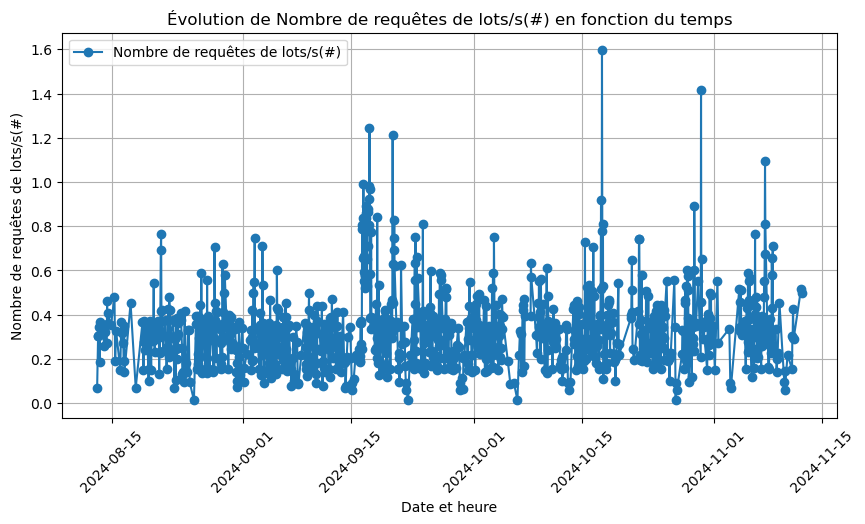

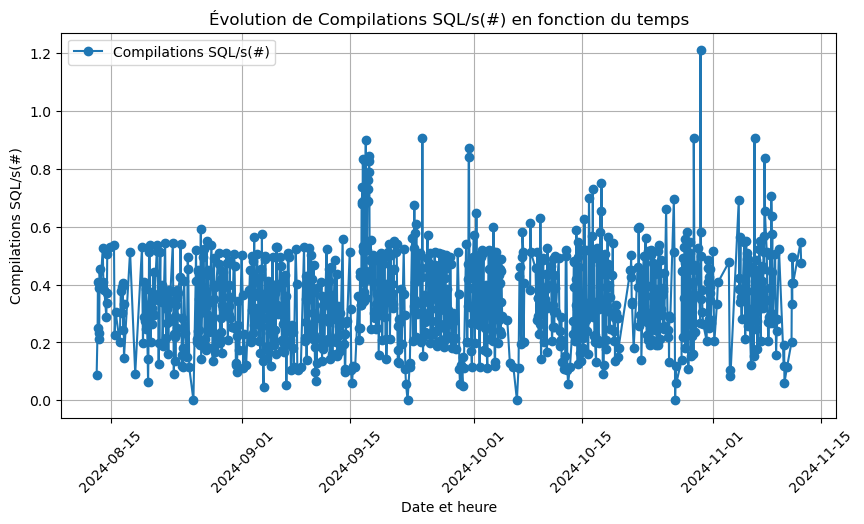

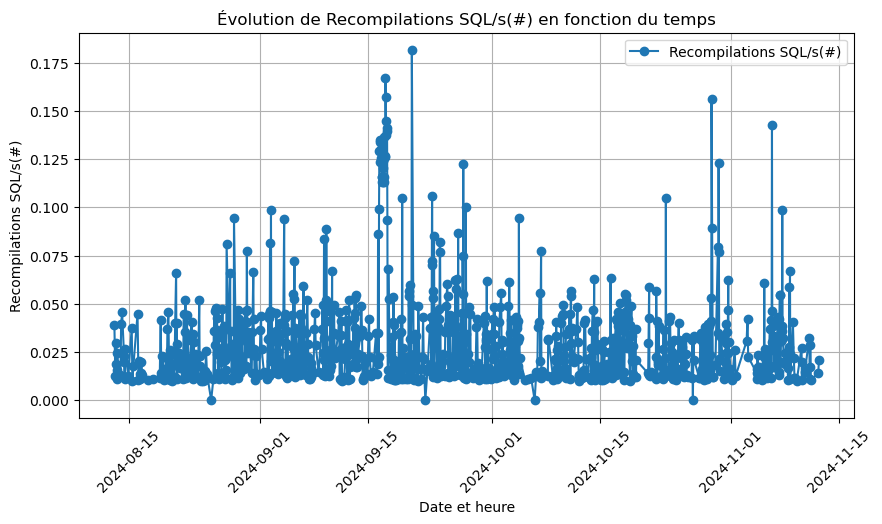

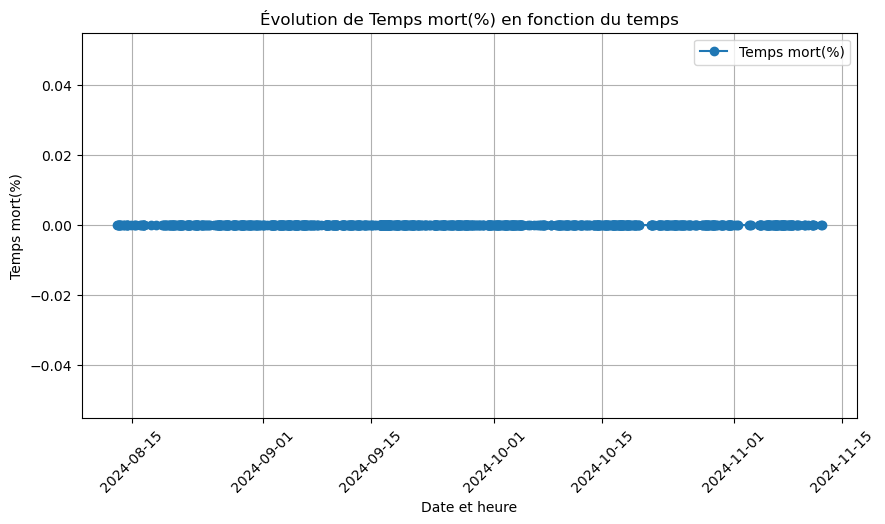

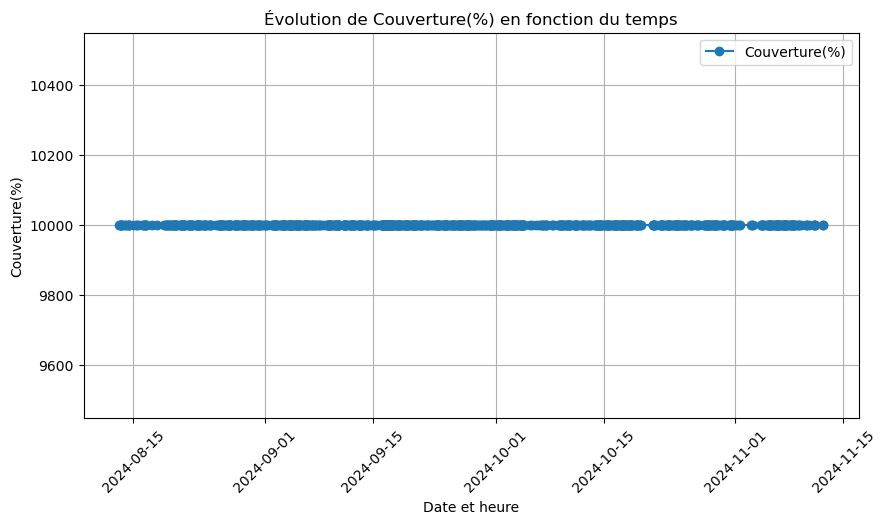

In [108]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'date_full' est bien au format datetime
tab["date_full"] = pd.to_datetime(tab["date_full"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["date_full"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

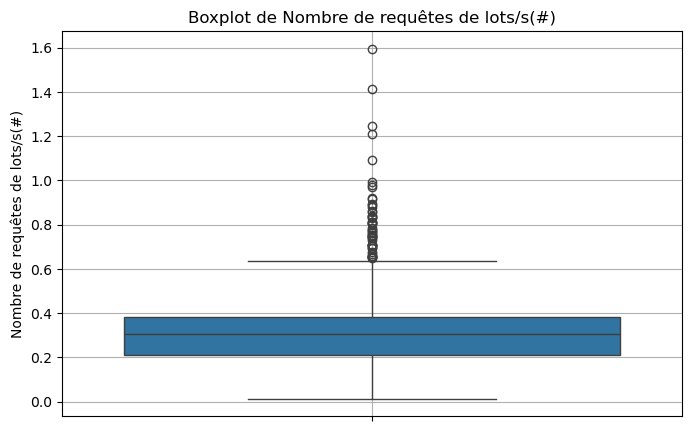

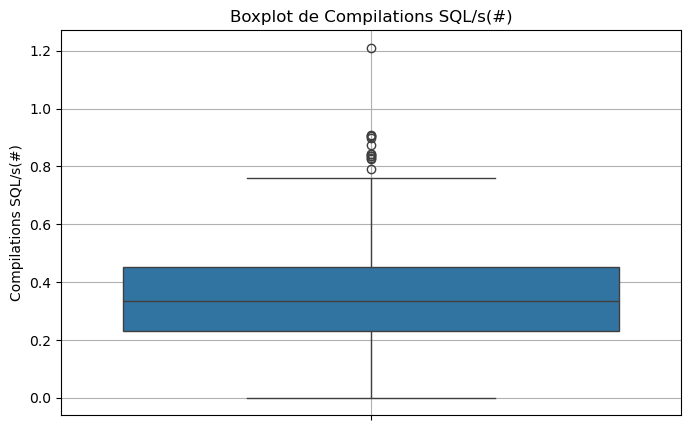

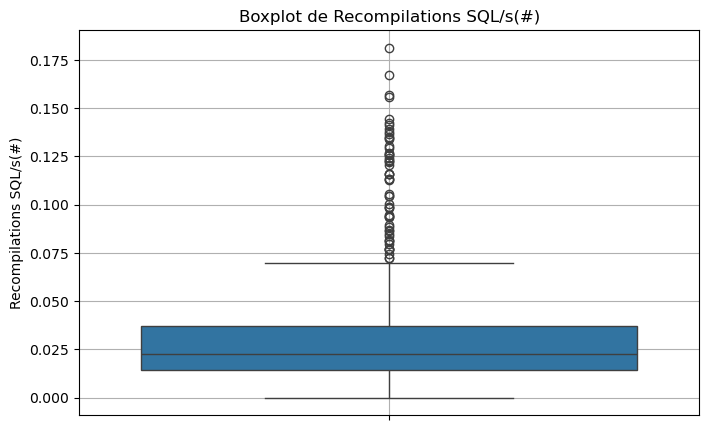

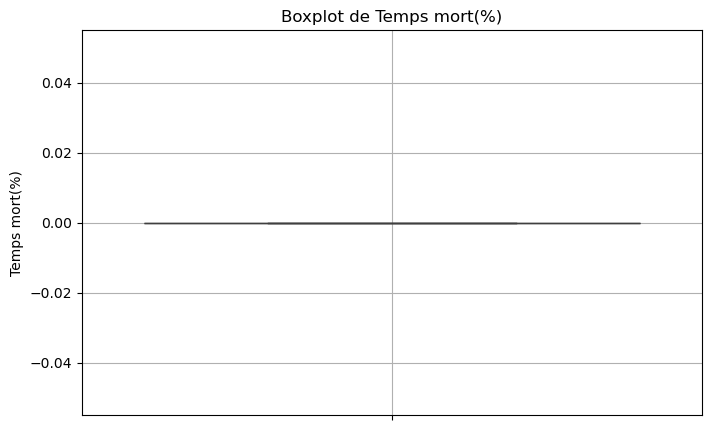

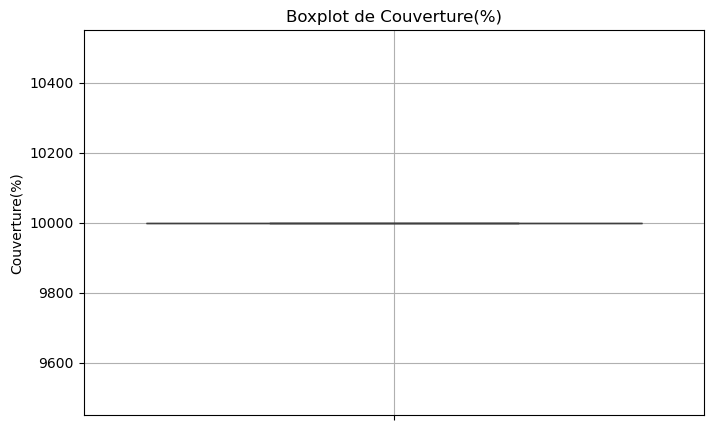

In [110]:
import seaborn as sns

# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

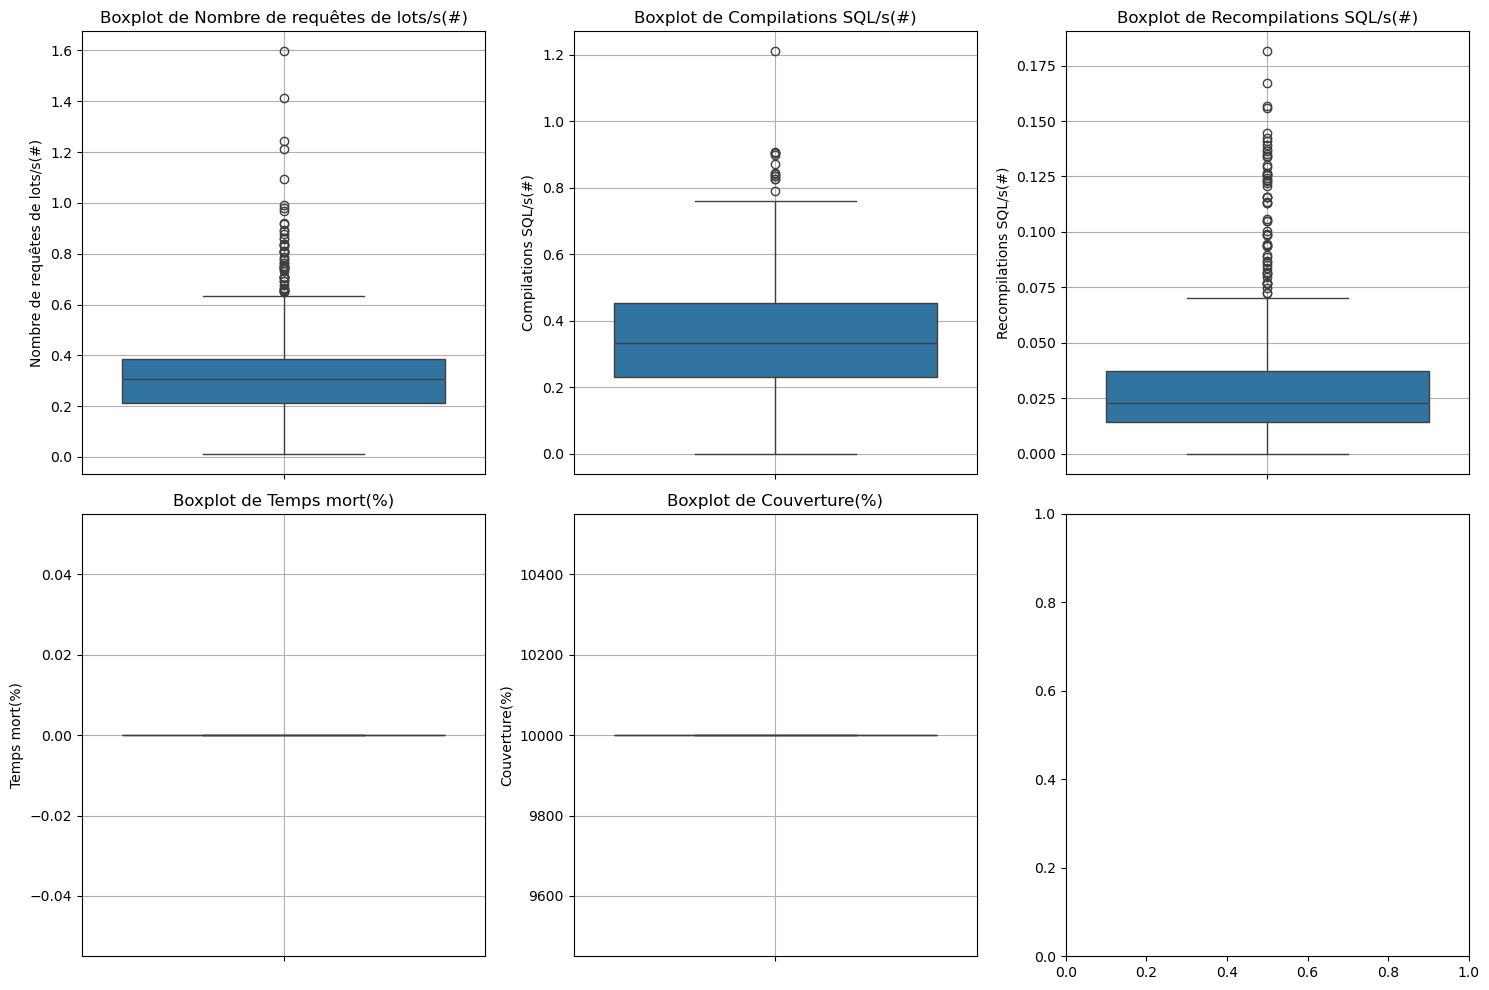

In [112]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

 #### Enregistrement du nouveau dataframe dans un nouveau csv

In [118]:
#### ATTENTION au path et nom de fichier
tab.to_csv("./filtered/myreport_sql_statistic_filtered.csv", index=False, encoding='utf-8')

#### Obsolete